In [38]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from insect_rl import plot
from insect_rl.mdp.utils import grid_math as gm
from functools import partial


df = pd.read_csv("../../irl/Wystrach2020/trap/data.csv")


In [26]:
df

,ant_nb,trial_nb,state_int,next_state_int,action,action_int,reached_goal
0,1,0,29,30,"(1, 0)",0,False
1,1,0,30,54,"(1, 1)",7,False
2,1,0,54,55,"(1, 0)",0,False
3,1,0,55,78,"(0, 1)",1,False
4,1,0,78,102,"(1, 1)",7,False
...,...,...,...,...,...,...,...
2091,31,0,1091,1114,"(0, 1)",1,False
2092,31,0,1114,1137,"(0, 1)",1,False
2093,31,0,1137,1160,"(0, 1)",1,False
2094,31,0,1160,1183,"(0, 1)",1,False


In [39]:
df["path"] = df["state_int"].apply(lambda x: gm.int_to_point(x,23))
df["path_next"] = df["next_state_int"].apply(lambda x: gm.int_to_point(x,23))
df[['path_x', 'path_y']] = pd.DataFrame(df['path'].tolist(), index=df.index)
df[['path_x_next', 'path_y_next']] = pd.DataFrame(df['path_next'].tolist(), index=df.index)


df

,ant_nb,trial_nb,state_int,next_state_int,action,action_int,reached_goal,path,path_next,path_x,path_y,path_x_next,path_y_next
0,32,8,52,74,"(-1, 1)",5,False,"(6, 2)","(5, 3)",6,2,5,3
1,32,8,74,97,"(0, 1)",1,False,"(5, 3)","(5, 4)",5,3,5,4
2,32,8,97,120,"(0, 1)",1,False,"(5, 4)","(5, 5)",5,4,5,5
3,32,8,120,144,"(1, 1)",7,False,"(5, 5)","(6, 6)",5,5,6,6
4,32,8,144,167,"(0, 1)",1,False,"(6, 6)","(6, 7)",6,6,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,61,2,1113,1136,"(0, 1)",1,False,"(9, 48)","(9, 49)",9,48,9,49
1842,61,2,1136,1158,"(-1, 1)",5,False,"(9, 49)","(8, 50)",9,49,8,50
1843,61,2,1158,1181,"(0, 1)",1,False,"(8, 50)","(8, 51)",8,50,8,51
1844,61,2,1181,1205,"(1, 1)",7,False,"(8, 51)","(9, 52)",8,51,9,52


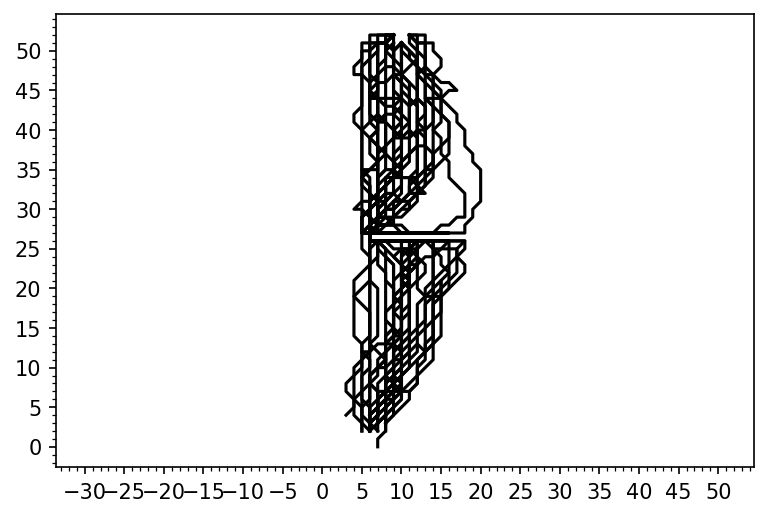

In [40]:
ax = plt.subplot()
by_ant_trial = df.groupby(["ant_nb", "trial_nb"])
for (ant,trial),frame in by_ant_trial:
    plot.draw_trajectories(frame, [partial(ax.plot, 'path_x', 'path_y')], ax)

In [41]:
#fig, axs = plt.subplots(nrows=1, ncols=len(df["ant_nb"].unique()), sharey=True)
by_ant_trial = df.groupby(["ant_nb", "trial_nb"])
#for i, ((ant,trial),frame) in enumerate(by_ant_trial):
    #plt.clf()
    #ax = plt.subplot()
    #plot.draw_trajectories(frame, [partial(ax.plot, 'path_x', 'path_y')], ax)
    #plt.show()
len(by_ant_trial)

30

Text(0, 0.5, '#times visited')

<Figure size 900x600 with 0 Axes>

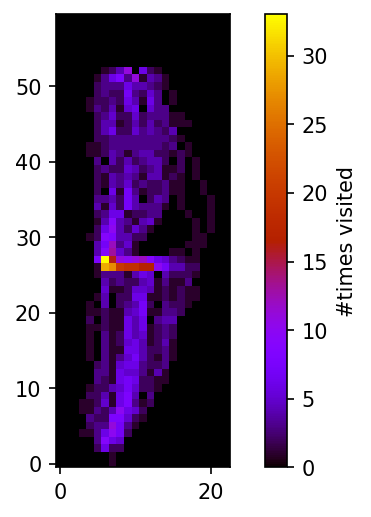

In [42]:
plt.clf()
matplotlib.rcParams["figure.dpi"] = 150

# prep heatmap
max_x = 60
max_y = 23

fig, ax = plt.subplots() #(nrows=1, ncols=len(sub_sample),  figsize=(15, 15), sharey=True)
sur_map = np.zeros((max_x, max_y))

for idx, ((ant,trial),frame) in enumerate(by_ant_trial):#idx, ant_df in enumerate(sub_sample):
    
    y_vals = list(frame['path_x'])
    x_vals = list(frame['path_y'])

    for i in range(0, len(x_vals)):
      sur_map[x_vals[i]][y_vals[i]] += 1

    #print(sur_map)

#sur_map /= len(by_ant_trial)
    
plt.imshow(sur_map, origin='lower', cmap="gnuplot") #[::-1]
clb = plt.colorbar()
clb.ax.set_ylabel('#times visited')